# Classifier Chains

---

En la clasificación tradicional (clasificación simple), cada instancia pertenece a una sola clase.
En la clasificación multietiqueta, una instancia puede pertenecer a varias clases al mismo tiempo.

Por ejemplo, una noticia puede etiquetarse como {“acción”, “comedia”, “ciencia ficción”} a la vez.

---

Classifier Chains (cadenas de clasificadores) es una técnica para resolver problemas de clasificación multietiqueta. Se propuso para modelar la dependencia entre las etiquetas.

---

## Algoritmo

1. Secuencia de clasificadores:
2. Se construye una cadena de clasificadores, uno para cada etiqueta.
Ejemplo: Si tienes 3 etiquetas (A, B, C), tendrás 3 clasificadores:
    * El primero predice A.
    * El segundo predice B (usando los datos originales + la predicción de A).
    * El tercero predice C (usando los datos originales + las predicciones de A y B).
3. Entrenamiento:
    * Cada clasificador se entrena en orden, usando como características tanto las variables originales como las etiquetas ya predichas por los clasificadores anteriores en la cadena.
4. Predicción:
    * Se predice secuencialmente: primero la etiqueta 1, luego la 2 (usando lo predicho para 1), luego la 3 (usando 1 y 2), etc.
  
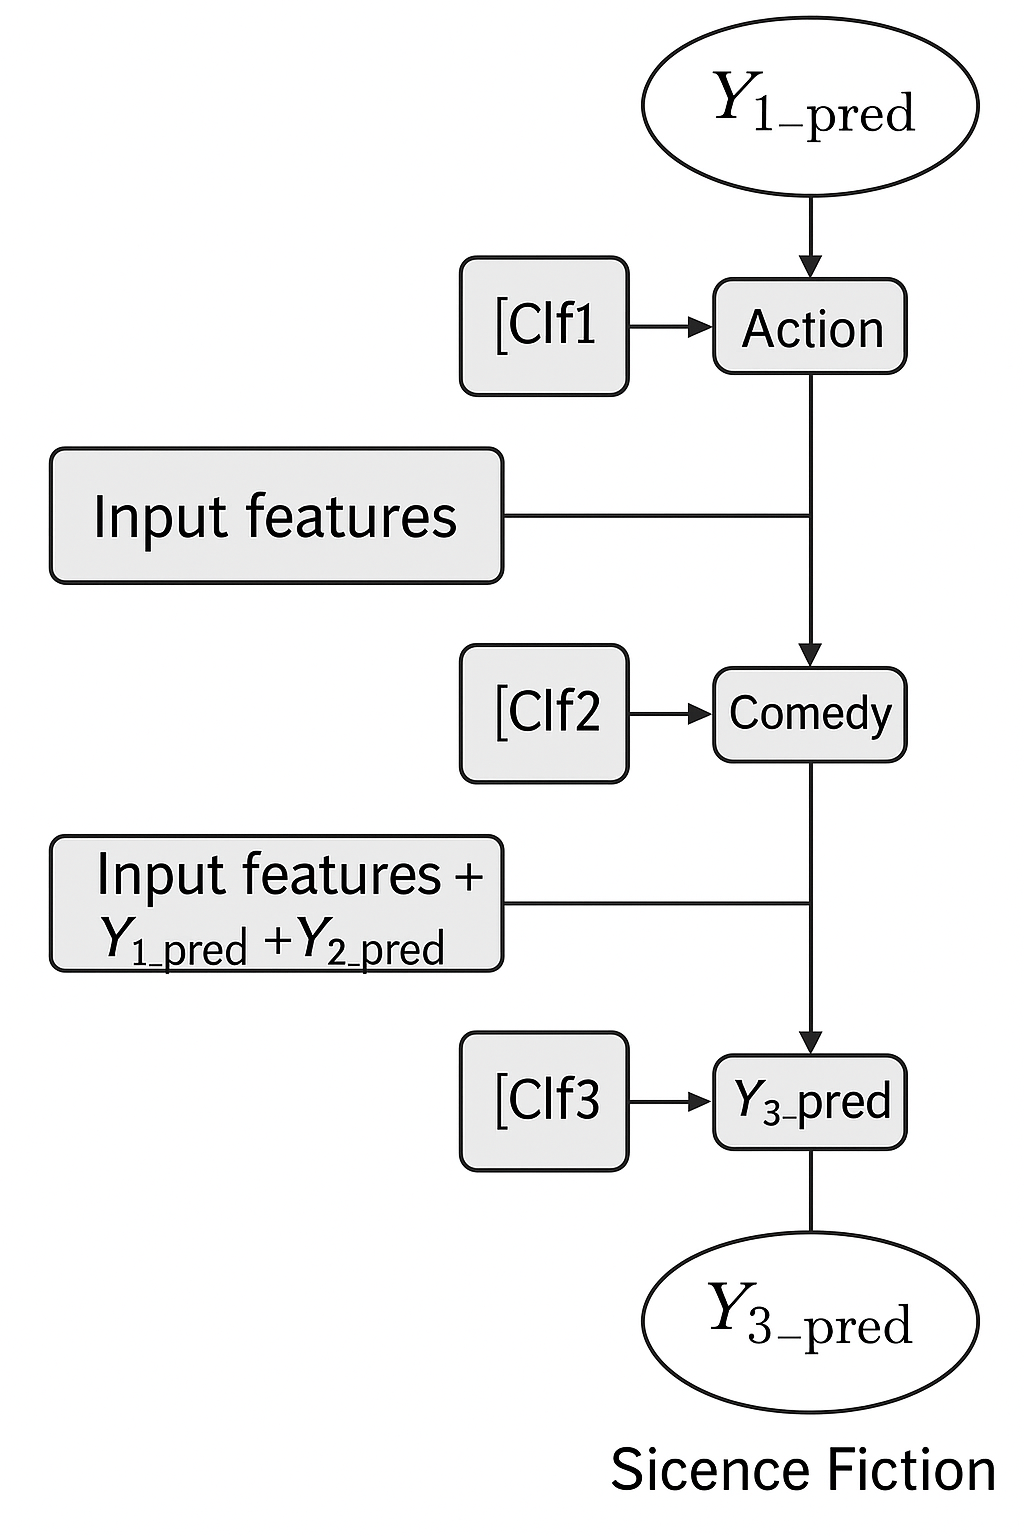

---

## Ejemplo

Tenemos tres etiquetas para una base de datos de películas:

    * Acción
    * Comedia
    * Ciencia Ficción

Una película puede ser de cualquier combinación de estos géneros (por ejemplo, una película puede ser de Acción y Ciencia Ficción, o solo de Comedia, etc.).

Cómo funciona Classifier Chains en este contexto:

    * Clasificador 1: Predice si la película es de Acción.
    * Clasificador 2: Predice si la película es de Comedia, usando además la predicción de Acción.
    * Clasificador 3: Predice si la película es de Ciencia Ficción, usando además las predicciones de Acción y Comedia.

---

Modela dependencias entre etiquetas (a diferencia del método “uno contra el resto”, que trata cada etiqueta de manera independiente).

Suele mejorar el rendimiento cuando las etiquetas no son independientes.

---

## Ventajas y desventajas

| Ventajas                                         | Desventajas                                      |
| ------------------------------------------------ | ------------------------------------------------ |
| * Captura dependencias entre etiquetas             | * El orden de la cadena puede afectar el resultado |
| * Fácil de implementar con clasificadores estándar | * Puede volverse costoso con muchas etiquetas      |
| * Mejora precisión frente a métodos independientes | * Acumula errores en cascada                       |

## Implementacion

    scikit-learn tiene ClassifierChain en sklearn.multioutput.

In [1]:
import numpy as np
from sklearn.multioutput import ClassifierChain
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Datos simulados (Año, Duración, Presupuesto)
X = np.array([
    [2010, 120, 100],
    [2005, 90, 30],
    [2018, 150, 180],
    [2012, 105, 45],
    [2020, 130, 200],
    [2015, 80, 10],
    [2017, 140, 150],
    [2011, 100, 50],
])

# Etiquetas multietiqueta: [Acción, Comedia, Ciencia Ficción]
Y = np.array([
    [1, 0, 1],   # Acción, no Comedia, Ciencia Ficción
    [0, 1, 0],   # No Acción, Comedia, no Ciencia Ficción
    [1, 0, 1],
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 0],
])

# División en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Modelo base
base_clf = LogisticRegression()

# Creamos el Classifier Chain
chain = ClassifierChain(base_clf, order='random', random_state=42)
chain.fit(X_train, Y_train)

# Predicción
Y_pred = chain.predict(X_test)

print("Predicciones (Acción, Comedia, Ciencia Ficción):")
print(Y_pred.astype(int))

print("\nEtiquetas reales:")
print(Y_test)


Predicciones (Acción, Comedia, Ciencia Ficción):
[[0 1 0]
 [0 1 0]]

Etiquetas reales:
[[0 1 0]
 [0 1 0]]
